In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# %config InlineBackend.close_figures=False # keep figures open in pyplot

In [2]:
numval = 5
numseed = 6
# ind 0: latent dim, ind 1: seed
psnr_dae = [[16.51, 17.48, 18.51, 19.16, 19.74],
            [16.49, 17.49, 18.44, 19.07, 19.63],
            [16.48, 17.5, 18.52, 19.27, 19.55],
            [16.47, 17.49, 18.63, 19.14, 19.52],
            [16.47, 17.5, 18.54, 19.06, 19.63],
            [16.48, 17.45, 18.6, 19.17, 19.77]]

psnr_jae = [[16.75, 18.0, 19.44, 20.4, 20.57],
            [16.79, 18.0, 19.41, 20.23, 19.91],
            [16.8, 18.07, 19.27, 19.93, 20.46],
            [16.74, 17.95, 19.4, 20.18, 20.54],
            [16.77, 18.01, 19.42, 20.24, 20.33],
            [16.71, 17.91, 19.48, 19.85, 20.71]]
psnr_ndpca = [[16.02, 17.47, 19.16, 19.98, 20.01],
              [16.21, 17.56, 19.17, 19.94, 19.95],
              [16.16, 17.53, 19.15, 19.82, 19.84], ############
              [16.16, 17.53, 19.15, 19.82, 19.84],
              [16.2, 17.6, 19.21, 19.79, 19.79],
              [16.22, 17.63, 19.24, 19.63, 19.64]]
Z = [8, 16, 32, 48, 64]
Z1 = [[8, 16, 31, 42, 55],
      [8, 16, 31, 41, 52],
      [8, 16, 30, 39, 48],
      [8, 16, 31, 41, 53],
      [8, 16, 31, 41, 53],
      [8, 16, 31, 41, 53]]

# convert to numpy array and transpose
psnr_dae = np.array(psnr_dae).T
psnr_jae = np.array(psnr_jae).T
psnr_ndpca = np.array(psnr_ndpca).T

Z = np.array(Z).T
Z1 = np.array(Z1).T

Z2 = np.zeros((numval, numseed))
### calculate Z2 = Z - Z1
for i in range(numval):
    for j in range(numseed):
      #   Z1[i, j] = int(Z[i] / 2)
        Z2[i, j] = Z[i] - Z1[i, j]
        # print(Z[i], Z1[i, j], Z2[i, j])

Z1 = [[8, 16, 32, 48, 64],
      [8, 16, 32, 48, 64],
      [8, 16, 32, 48, 64],
      [8, 16, 32, 48, 64],
      [8, 16, 32, 48, 64],
      [8, 16, 32, 48, 64]]    

Z1 = np.array(Z1).T    

In [3]:
cifar_df = pd.DataFrame()
### add columns
for i in range(len(psnr_dae)): ### latent dim
    for j in range(len(psnr_dae[0])): ### seed
        cifar_df = cifar_df.append({'dpca_dim': Z[i], 'Z1': Z1[i, j], 'Z2': Z2[i, j] ,'psnr': psnr_ndpca[i, j], 'method': 'NDPCA (ours)', 'seed': j}, ignore_index=True)
        cifar_df = cifar_df.append({'dpca_dim': Z[i], 'Z1': Z1[i, j], 'Z2': Z2[i, j] ,'psnr': psnr_dae[i, j], 'method': 'DAE', 'seed': j}, ignore_index=True)
        cifar_df = cifar_df.append({'dpca_dim': Z[i], 'Z1': Z1[i, j], 'Z2': Z2[i, j] ,'psnr': psnr_jae[i, j], 'method': 'JAE', 'seed': j}, ignore_index=True)

print(cifar_df.head())
print(cifar_df.tail())

   dpca_dim  Z1   Z2   psnr        method  seed
0         8   8  0.0  16.02  NDPCA (ours)     0
1         8   8  0.0  16.51           DAE     0
2         8   8  0.0  16.75           JAE     0
3         8   8  0.0  16.21  NDPCA (ours)     1
4         8   8  0.0  16.49           DAE     1
    dpca_dim  Z1    Z2   psnr        method  seed
85        64  64  11.0  19.63           DAE     4
86        64  64  11.0  20.33           JAE     4
87        64  64  11.0  19.64  NDPCA (ours)     5
88        64  64  11.0  19.77           DAE     5
89        64  64  11.0  20.71           JAE     5


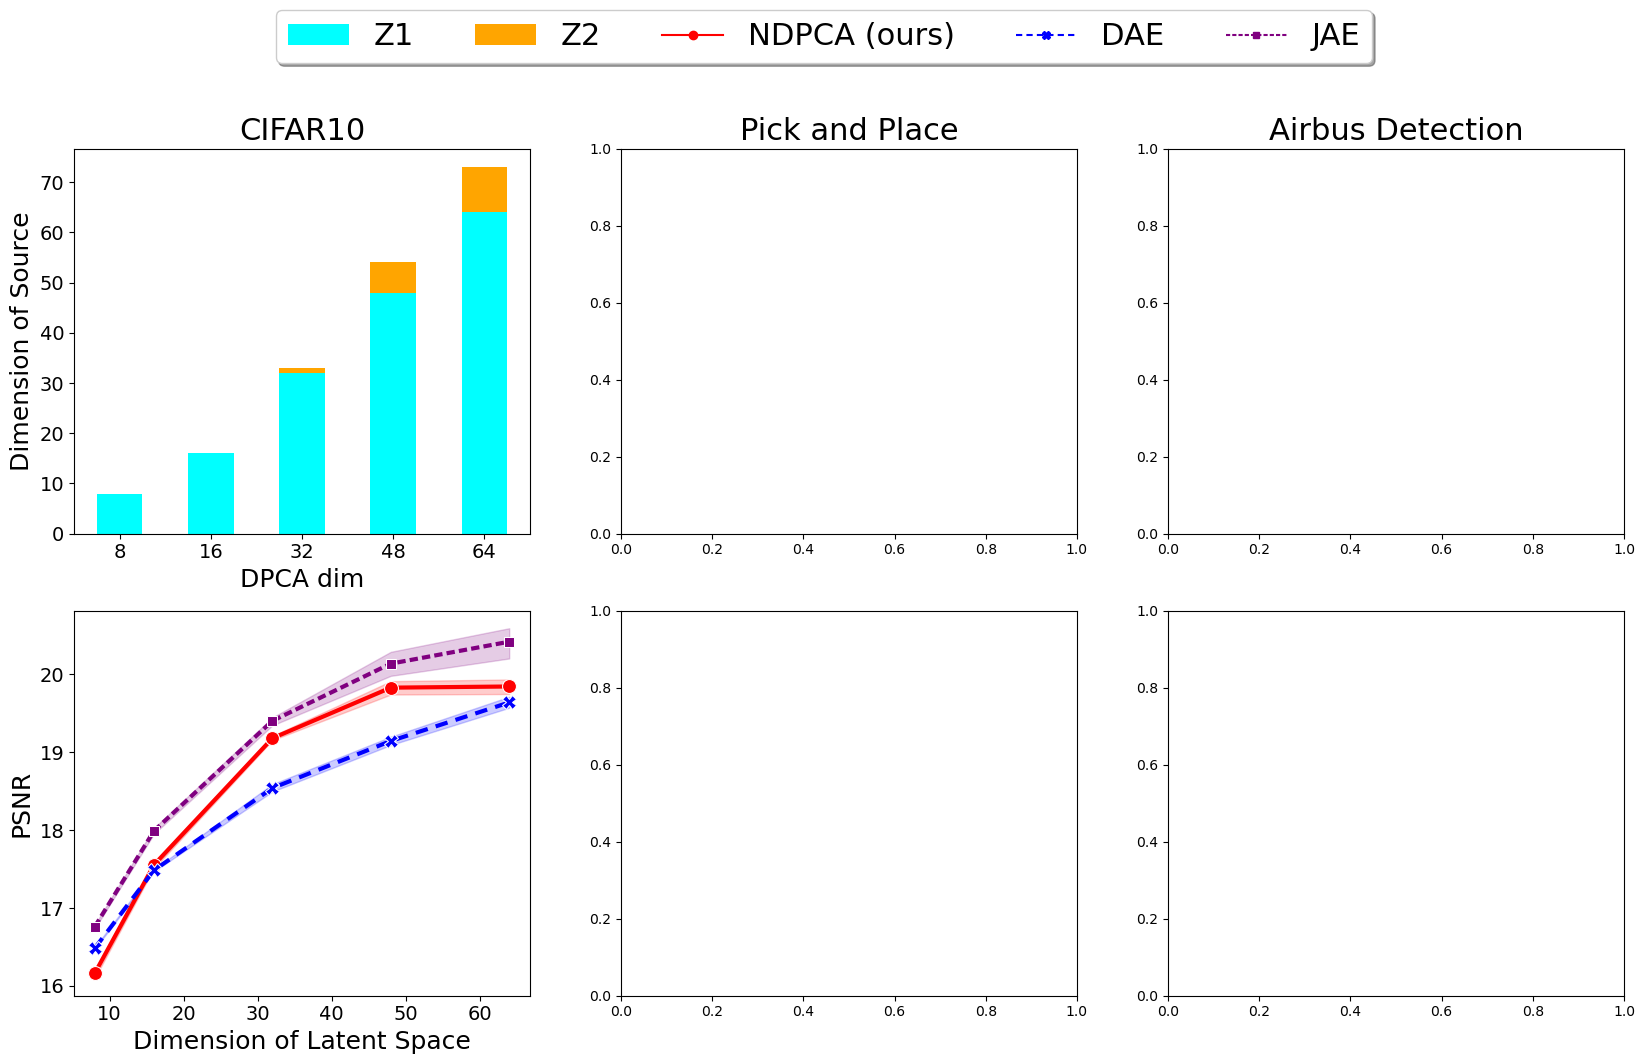

In [4]:
fig, ax_list = plt.subplot_mosaic(
        [["cifar_z", "pnp_z", "airbus_z"], 
        ["cifar_dpca", "pnp_dpca", "airbus_dpca"]],
        figsize=(20, 11))
        # gridspec_kw={
            # set the height ratios between the rows
            # "height_ratios": [1.5, 1.5, 1.5, 2, 2, 2],
            # set the width ratios between the columns
            # "width_ratios": [1, 1, 1, 1],})

####### ax #######
# 1 2 3
# 4 5 6
####### ax #######

### set title
ax_list["cifar_z"].set_title("CIFAR10", fontsize=22)
ax_list["pnp_z"].set_title("Pick and Place", fontsize=22)
ax_list["airbus_z"].set_title("Airbus Detection", fontsize=22)


### plot cifar denoising

## plot DPCA curve
ax4 = sns.lineplot(data=cifar_df, x="dpca_dim", y="psnr", ax=ax_list["cifar_dpca"], linewidth=3, hue='method',
                    palette=['red', 'blue', 'purple'], dashes=['', (3,2), (2,1)], style="method", markers=True, markersize=10)
ax_list["cifar_dpca"].set_xlabel("Dimension of Latent Space", fontsize=18)
ax_list["cifar_dpca"].set_ylabel("PSNR", fontsize=18)
ax_list["cifar_dpca"].tick_params(axis="x", labelsize=14)
ax_list["cifar_dpca"].tick_params(axis="y", labelsize=14)
ax_list["cifar_dpca"].legend().remove()

## plot Z1 and Z2
cifar_df_z = cifar_df.loc[(cifar_df["method"]).str.contains('NDPCA') & (cifar_df["seed"] == cifar_df.iloc[0]["seed"]) ]
cifar_df_z.plot(kind='bar', stacked=True, color=['aqua', 'orange'], ax=ax_list["cifar_z"], 
                x="dpca_dim", y=["Z1", "Z2"], width=0.5, rot=0)
ax_list["cifar_z"].set_xlabel("DPCA dim", fontsize=18)
ax_list["cifar_z"].set_ylabel("Dimension of Source", fontsize=18)
ax_list["cifar_z"].tick_params(axis="x", labelsize=14)
ax_list["cifar_z"].tick_params(axis="y", labelsize=14)
ax_list["cifar_z"].legend().remove()

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes ]#[ax_list["cifar_dpca"], ax_list["cifar_z"]]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
lgd = fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.02), fancybox=True, shadow=True, ncol=6, fontsize=22)
plt.show()